# Preparando espécie American Toad

## Limpando dataset

In [236]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsRegressor
%matplotlib inline

In [237]:
base = pd.read_csv("americanToadCorre.csv")

In [238]:
base.drop('id',axis=1,inplace=True)
base

,date,lat,lng,tornado,monthtodatesnowfalli,thunder,meantempi,snow,meanvism,meanwdire,...,meanwdird,meandewpti,meanvisi,maxhumidity,snowdepthi,mintempm,since1julsnowfalli,maxtempi,maxdewpti,mindewpti
0,20150603,49.044380,-123.883420,0.0,NaN,0.0,62.0,0.0,NaN,Variable,...,-1.0,48.0,NaN,75.0,NaN,12.0,NaN,69.0,50.0,46.0
1,20150603,49.044380,-123.883420,0.0,NaN,0.0,52.0,0.0,27.6,NE,...,38.0,50.0,17.2,98.0,NaN,6.0,NaN,62.0,54.0,40.0
2,20080504,46.444667,-63.414966,0.0,NaN,0.0,44.0,0.0,NaN,ENE,...,59.0,36.0,NaN,100.0,NaN,-2.0,NaN,61.0,43.0,28.0
3,20111026,46.241592,-63.544820,0.0,NaN,0.0,46.0,0.0,NaN,NW,...,320.0,38.0,NaN,95.0,NaN,5.0,NaN,49.0,45.0,32.0
4,20170501,46.359260,-63.194550,0.0,NaN,0.0,40.0,0.0,NaN,South,...,191.0,30.0,NaN,83.0,NaN,0.0,NaN,49.0,39.0,21.0
5,20100709,46.438330,-64.127423,0.0,NaN,0.0,73.0,0.0,NaN,SW,...,218.0,66.0,NaN,92.0,NaN,19.0,NaN,80.0,69.0,62.0
6,20110512,46.334425,-63.703709,0.0,NaN,0.0,42.0,0.0,NaN,NE,...,39.0,38.0,NaN,95.0,NaN,4.0,NaN,44.0,39.0,37.0
7,20020830,50.705795,-97.102335,0.0,NaN,0.0,72.0,0.0,NaN,SSE,...,162.0,69.0,NaN,100.0,NaN,20.0,NaN,75.0,71.0,66.0
8,20020914,50.705795,-97.102335,0.0,NaN,0.0,54.0,0.0,NaN,WNW,...,297.0,43.0,NaN,96.0,NaN,7.0,NaN,64.0,46.0,38.0
9,20020917,50.705795,-97.102335,0.0,NaN,0.0,72.0,0.0,NaN,South,...,174.0,59.0,NaN,88.0,NaN,17.0,NaN,81.0,63.0,55.0


In [239]:
#Eliminando pontos coordenados errados
base.drop(3430,inplace=True)
base.drop(3434,inplace=True)
base.drop(3446,inplace=True)
base.drop(3454,inplace=True)
base.drop(3489,inplace=True)
base.drop(3533,inplace=True)
base.drop(3420,inplace=True)

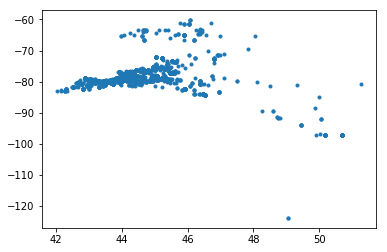

In [240]:
plt.scatter(base["lat"].head(3455), base["lng"].head(3455),marker=".")

In [241]:
base.shape

(3675, 72)

In [242]:
#Base original
base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3675 entries, 0 to 3681
Data columns (total 72 columns):
date                                  3675 non-null int64
lat                                   3675 non-null float64
lng                                   3675 non-null float64
tornado                               3561 non-null float64
monthtodatesnowfalli                  24 non-null object
thunder                               3561 non-null float64
meantempi                             3502 non-null float64
snow                                  3561 non-null float64
meanvism                              1691 non-null float64
meanwdire                             3430 non-null object
minhumidity                           3484 non-null float64
maxvism                               1691 non-null float64
since1jancoolingdegreedays            39 non-null float64
coolingdegreedays                     3502 non-null float64
maxdewptm                             3484 non-null float64
m

In [243]:
#Descrição da base original
base.describe()

,date,lat,lng,tornado,thunder,meantempi,snow,meanvism,minhumidity,maxvism,...,meanwdird,meandewpti,meanvisi,maxhumidity,snowdepthi,mintempm,since1julsnowfalli,maxtempi,maxdewpti,mindewpti
count,3.675000e+03,3675.000000,3675.000000,3561.0,3561.000000,3502.000000,3561.000000,1691.000000,3484.000000,1691.000000,...,3561.000000,3484.000000,1691.00000,3484.000000,24.0,3503.000000,24.000000,3503.000000,3484.000000,3484.000000
mean,2.008286e+07,44.922232,-78.370079,0.0,0.046616,58.595945,0.005336,17.144648,43.931688,20.598108,...,138.276889,48.096728,10.66984,89.204937,0.0,8.805881,36.750000,69.580645,53.421929,42.293915
std,5.152130e+04,1.592920,6.048941,0.0,0.210845,9.752716,0.072860,5.771699,18.516513,4.592061,...,116.293902,11.177302,3.59805,11.459220,0.0,5.713660,29.078679,10.973216,10.832790,12.085173
min,1.997050e+07,42.025100,-123.883420,0.0,0.000000,-11.000000,0.000000,1.600000,4.000000,3.000000,...,-1.000000,-17.000000,1.00000,24.000000,0.0,-33.000000,0.000000,6.000000,-4.000000,-33.000000
25%,2.004042e+07,43.942236,-79.750000,0.0,0.000000,52.000000,0.000000,13.650000,30.000000,16.000000,...,-1.000000,40.000000,8.50000,84.000000,0.0,5.000000,0.000000,63.000000,46.000000,34.000000
50%,2.008070e+07,44.813333,-79.207394,0.0,0.000000,59.000000,0.000000,16.000000,42.500000,24.100000,...,146.000000,49.000000,10.00000,93.000000,0.0,9.000000,58.800000,71.000000,55.000000,43.000000
75%,2.012080e+07,45.341407,-77.501954,0.0,0.000000,66.000000,0.000000,23.400000,56.000000,24.100000,...,234.000000,56.000000,14.60000,99.000000,0.0,13.000000,58.800000,77.000000,61.000000,51.000000
max,2.018100e+07,51.269538,-52.736600,0.0,1.000000,85.000000,1.000000,29.200000,100.000000,32.200000,...,360.000000,77.000000,18.10000,100.000000,0.0,25.000000,58.800000,130.000000,88.000000,75.000000


In [244]:
# Elimina as features com poucos valores ou as que são preenchidas com 0
zeros = []
poucos = []
for c in base.columns:
    if (base[c].dtype != 'object' and base[c].mean() == 0):
        base.drop(c,axis=1,inplace=True)
        zeros.append(c)
    elif (base[c].count() < 1700):
        poucos.append(c)
        base.drop(c,axis=1,inplace=True)
zeros

['tornado', 'snowdepthm', 'snowdepthi']

In [245]:
poucos

['monthtodatesnowfalli',
 'meanvism',
 'maxvism',
 'since1jancoolingdegreedays',
 'monthtodatecoolingdegreedays',
 'since1sepheatingdegreedays',
 'since1julsnowfallm',
 'monthtodatesnowfallm',
 'since1sepcoolingdegreedaysnormal',
 'monthtodateheatingdegreedaysnormal',
 'snowfallm',
 'since1julheatingdegreedays',
 'coolingdegreedaysnormal',
 'minvisi',
 'since1sepheatingdegreedaysnormal',
 'since1julheatingdegreedaysnormal',
 'snowfalli',
 'monthtodateheatingdegreedays',
 'monthtodatecoolingdegreedaysnormal',
 'since1sepcoolingdegreedays',
 'minvism',
 'maxvisi',
 'heatingdegreedaysnormal',
 'since1jancoolingdegreedaysnormal',
 'meanvisi',
 'since1julsnowfalli']

In [246]:
base.shape

(3675, 43)

In [247]:
base

,date,lat,lng,thunder,meantempi,snow,meanwdire,minhumidity,coolingdegreedays,maxdewptm,...,meantempm,maxpressurei,minpressurei,meanwdird,meandewpti,maxhumidity,mintempm,maxtempi,maxdewpti,mindewpti
0,20150603,49.044380,-123.883420,0.0,62.0,0.0,Variable,50.0,0.0,10.0,...,16.0,30.04,30.01,-1.0,48.0,75.0,12.0,69.0,50.0,46.0
1,20150603,49.044380,-123.883420,0.0,52.0,0.0,NE,46.0,0.0,12.0,...,12.0,30.26,30.03,38.0,50.0,98.0,6.0,62.0,54.0,40.0
2,20080504,46.444667,-63.414966,0.0,44.0,0.0,ENE,36.0,0.0,6.0,...,7.0,30.22,30.07,59.0,36.0,100.0,-2.0,61.0,43.0,28.0
3,20111026,46.241592,-63.544820,0.0,46.0,0.0,NW,51.0,0.0,7.0,...,7.0,29.61,29.49,320.0,38.0,95.0,5.0,49.0,45.0,32.0
4,20170501,46.359260,-63.194550,0.0,40.0,0.0,South,32.0,0.0,4.0,...,4.0,30.27,30.12,191.0,30.0,83.0,0.0,49.0,39.0,21.0
5,20100709,46.438330,-64.127423,0.0,73.0,0.0,SW,52.0,8.0,21.0,...,22.0,30.01,29.89,218.0,66.0,92.0,19.0,80.0,69.0,62.0
6,20110512,46.334425,-63.703709,0.0,42.0,0.0,NE,77.0,0.0,4.0,...,5.0,30.17,30.04,39.0,38.0,95.0,4.0,44.0,39.0,37.0
7,20020830,50.705795,-97.102335,0.0,72.0,0.0,SSE,79.0,6.0,22.0,...,22.0,NaN,NaN,162.0,69.0,100.0,20.0,75.0,71.0,66.0
8,20020914,50.705795,-97.102335,0.0,54.0,0.0,WNW,38.0,0.0,8.0,...,12.0,NaN,NaN,297.0,43.0,96.0,7.0,64.0,46.0,38.0
9,20020917,50.705795,-97.102335,0.0,72.0,0.0,South,41.0,7.0,17.0,...,22.0,NaN,NaN,174.0,59.0,88.0,17.0,81.0,63.0,55.0


In [248]:
#Descrição da base após eliminação de features
base.describe()

,date,lat,lng,thunder,meantempi,snow,minhumidity,coolingdegreedays,maxdewptm,heatingdegreedays,...,meantempm,maxpressurei,minpressurei,meanwdird,meandewpti,maxhumidity,mintempm,maxtempi,maxdewpti,mindewpti
count,3.675000e+03,3675.000000,3675.000000,3561.000000,3502.000000,3561.000000,3484.000000,3502.000000,3484.000000,3502.000000,...,3502.000000,3327.000000,3327.000000,3561.000000,3484.000000,3484.000000,3503.000000,3503.000000,3484.000000,3484.000000
mean,2.008286e+07,44.922232,-78.370079,0.046616,58.595945,0.005336,43.931688,1.347230,11.887486,7.731868,...,14.739863,30.067238,29.910724,138.276889,48.096728,89.204937,8.805881,69.580645,53.421929,42.293915
std,5.152130e+04,1.592920,6.048941,0.210845,9.752716,0.072860,18.516513,3.015989,6.019060,8.066122,...,5.387896,0.177172,0.192385,116.293902,11.177302,11.459220,5.713660,10.973216,10.832790,12.085173
min,1.997050e+07,42.025100,-123.883420,0.000000,-11.000000,0.000000,4.000000,0.000000,-20.000000,0.000000,...,-24.000000,29.370000,29.050000,-1.000000,-17.000000,24.000000,-33.000000,6.000000,-4.000000,-33.000000
25%,2.004042e+07,43.942236,-79.750000,0.000000,52.000000,0.000000,30.000000,0.000000,8.000000,0.000000,...,12.000000,29.950000,29.790000,-1.000000,40.000000,84.000000,5.000000,63.000000,46.000000,34.000000
50%,2.008070e+07,44.813333,-79.207394,0.000000,59.000000,0.000000,42.500000,0.000000,13.000000,6.000000,...,15.000000,30.070000,29.920000,146.000000,49.000000,93.000000,9.000000,71.000000,55.000000,43.000000
75%,2.012080e+07,45.341407,-77.501954,0.000000,66.000000,0.000000,56.000000,0.000000,16.000000,12.000000,...,18.000000,30.180000,30.040000,234.000000,56.000000,99.000000,13.000000,77.000000,61.000000,51.000000
max,2.018100e+07,51.269538,-52.736600,1.000000,85.000000,1.000000,100.000000,20.000000,31.000000,76.000000,...,30.000000,30.810000,30.460000,360.000000,77.000000,100.000000,25.000000,130.000000,88.000000,75.000000


In [249]:
#Features restantes
base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3675 entries, 0 to 3681
Data columns (total 43 columns):
date                 3675 non-null int64
lat                  3675 non-null float64
lng                  3675 non-null float64
thunder              3561 non-null float64
meantempi            3502 non-null float64
snow                 3561 non-null float64
meanwdire            3430 non-null object
minhumidity          3484 non-null float64
coolingdegreedays    3502 non-null float64
maxdewptm            3484 non-null float64
precipi              3561 non-null object
heatingdegreedays    3502 non-null float64
meanpressurem        3327 non-null float64
precipsource         3430 non-null object
rain                 3561 non-null float64
minwspdm             3397 non-null float64
meanwindspdi         3397 non-null float64
fog                  3561 non-null float64
humidity             3352 non-null float64
minwspdi             3397 non-null float64
meanpressurei        3327 non-null flo

In [250]:
base.describe()

,date,lat,lng,thunder,meantempi,snow,minhumidity,coolingdegreedays,maxdewptm,heatingdegreedays,...,meantempm,maxpressurei,minpressurei,meanwdird,meandewpti,maxhumidity,mintempm,maxtempi,maxdewpti,mindewpti
count,3.675000e+03,3675.000000,3675.000000,3561.000000,3502.000000,3561.000000,3484.000000,3502.000000,3484.000000,3502.000000,...,3502.000000,3327.000000,3327.000000,3561.000000,3484.000000,3484.000000,3503.000000,3503.000000,3484.000000,3484.000000
mean,2.008286e+07,44.922232,-78.370079,0.046616,58.595945,0.005336,43.931688,1.347230,11.887486,7.731868,...,14.739863,30.067238,29.910724,138.276889,48.096728,89.204937,8.805881,69.580645,53.421929,42.293915
std,5.152130e+04,1.592920,6.048941,0.210845,9.752716,0.072860,18.516513,3.015989,6.019060,8.066122,...,5.387896,0.177172,0.192385,116.293902,11.177302,11.459220,5.713660,10.973216,10.832790,12.085173
min,1.997050e+07,42.025100,-123.883420,0.000000,-11.000000,0.000000,4.000000,0.000000,-20.000000,0.000000,...,-24.000000,29.370000,29.050000,-1.000000,-17.000000,24.000000,-33.000000,6.000000,-4.000000,-33.000000
25%,2.004042e+07,43.942236,-79.750000,0.000000,52.000000,0.000000,30.000000,0.000000,8.000000,0.000000,...,12.000000,29.950000,29.790000,-1.000000,40.000000,84.000000,5.000000,63.000000,46.000000,34.000000
50%,2.008070e+07,44.813333,-79.207394,0.000000,59.000000,0.000000,42.500000,0.000000,13.000000,6.000000,...,15.000000,30.070000,29.920000,146.000000,49.000000,93.000000,9.000000,71.000000,55.000000,43.000000
75%,2.012080e+07,45.341407,-77.501954,0.000000,66.000000,0.000000,56.000000,0.000000,16.000000,12.000000,...,18.000000,30.180000,30.040000,234.000000,56.000000,99.000000,13.000000,77.000000,61.000000,51.000000
max,2.018100e+07,51.269538,-52.736600,1.000000,85.000000,1.000000,100.000000,20.000000,31.000000,76.000000,...,30.000000,30.810000,30.460000,360.000000,77.000000,100.000000,25.000000,130.000000,88.000000,75.000000


In [251]:
base['hail'].describe()

count    3561.000000
mean        0.001123
std         0.033501
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: hail, dtype: float64

## Verificando se alguma coordenada dá no mar

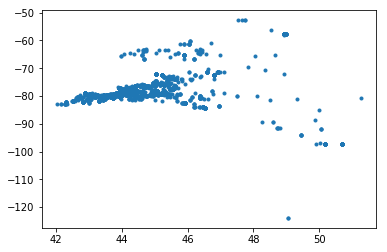

In [160]:
import mplleaflet
plt.scatter(base["lat"], base["lng"], marker=".")

## Convertendo Objects a Int

In [161]:
objects = []
for c in base.columns:
    if (base[c].dtype == 'object'):
        objects.append(c)
objects

['meanwdire', 'precipi', 'precipsource', 'precipm']

### meanwdire

In [162]:
set(base['meanwdire'])

{nan,
 'ENE',
 'ESE',
 'East',
 'NE',
 'NNE',
 'NNW',
 'NW',
 'North',
 'SE',
 'SSE',
 'SSW',
 'SW',
 'South',
 'Variable',
 'WNW',
 'WSW',
 'West'}

In [163]:
#Considerada pouco importante
base.drop('meanwdire',axis=1,inplace=True)

### precipi

In [164]:
set(base['precipi'])

{nan,
 '0.00',
 '0.01',
 '0.02',
 '0.03',
 '0.04',
 '0.05',
 '0.06',
 '0.07',
 '0.08',
 '0.09',
 '0.10',
 '0.11',
 '0.12',
 '0.13',
 '0.14',
 '0.16',
 '0.17',
 '0.18',
 '0.19',
 '0.20',
 '0.21',
 '0.22',
 '0.23',
 '0.24',
 '0.26',
 '0.27',
 '0.28',
 '0.29',
 '0.30',
 '0.31',
 '0.32',
 '0.33',
 '0.34',
 '0.35',
 '0.36',
 '0.37',
 '0.39',
 '0.42',
 '0.43',
 '0.45',
 '0.46',
 '0.47',
 '0.48',
 '0.50',
 '0.51',
 '0.53',
 '0.54',
 '0.55',
 '0.56',
 '0.59',
 '0.60',
 '0.61',
 '0.62',
 '0.63',
 '0.64',
 '0.67',
 '0.71',
 '0.75',
 '0.79',
 '0.83',
 '0.87',
 '0.91',
 '0.96',
 '0.97',
 '0.98',
 '1.00',
 '1.10',
 '1.12',
 '1.14',
 '1.18',
 '1.26',
 '1.38',
 '1.46',
 '1.54',
 '1.57',
 '1.81',
 '1.85',
 '2.01',
 '2.60',
 '5.59',
 'T'}

In [165]:
base['precipi'].replace({'T':6},inplace=True)

In [166]:
set(base['precipi'])

{nan,
 6,
 '0.00',
 '0.01',
 '0.02',
 '0.03',
 '0.04',
 '0.05',
 '0.06',
 '0.07',
 '0.08',
 '0.09',
 '0.10',
 '0.11',
 '0.12',
 '0.13',
 '0.14',
 '0.16',
 '0.17',
 '0.18',
 '0.19',
 '0.20',
 '0.21',
 '0.22',
 '0.23',
 '0.24',
 '0.26',
 '0.27',
 '0.28',
 '0.29',
 '0.30',
 '0.31',
 '0.32',
 '0.33',
 '0.34',
 '0.35',
 '0.36',
 '0.37',
 '0.39',
 '0.42',
 '0.43',
 '0.45',
 '0.46',
 '0.47',
 '0.48',
 '0.50',
 '0.51',
 '0.53',
 '0.54',
 '0.55',
 '0.56',
 '0.59',
 '0.60',
 '0.61',
 '0.62',
 '0.63',
 '0.64',
 '0.67',
 '0.71',
 '0.75',
 '0.79',
 '0.83',
 '0.87',
 '0.91',
 '0.96',
 '0.97',
 '0.98',
 '1.00',
 '1.10',
 '1.12',
 '1.14',
 '1.18',
 '1.26',
 '1.38',
 '1.46',
 '1.54',
 '1.57',
 '1.81',
 '1.85',
 '2.01',
 '2.60',
 '5.59'}

In [167]:
base['precipi'] = base['precipi'].astype('float')

In [168]:
set(base['precipi'])

{0.0,
 nan,
 nan,
 0.03,
 0.2,
 0.24,
 0.28,
 0.98,
 1.0,
 nan,
 0.12,
 0.39,
 0.51,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.26,
 0.45,
 0.46,
 0.55,
 0.67,
 0.71,
 6.0,
 nan,
 nan,
 2.01,
 nan,
 nan,
 nan,
 0.22,
 nan,
 nan,
 nan,
 nan,
 0.59,
 nan,
 nan,
 nan,
 1.18,
 nan,
 nan,
 nan,
 0.96,
 nan,
 nan,
 nan,
 nan,
 0.19,
 nan,
 nan,
 nan,
 nan,
 0.01,
 0.07,
 0.1,
 0.13,
 0.17,
 0.21,
 0.29,
 1.85,
 nan,
 0.09,
 0.18,
 0.3,
 0.31,
 0.43,
 0.5,
 0.56,
 0.6,
 0.61,
 1.14,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.42,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 1.12,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.11,
 1.46,
 nan,
 nan,
 0.36,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.64,
 1.38,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.54,
 2.6,
 nan,
 nan,
 nan,
 nan,
 0.33,
 nan,
 nan,
 1.57,
 nan,
 nan,
 nan,
 nan,
 0.23,
 nan,
 nan,
 0.08,
 nan,
 nan,
 0.02,
 nan,
 nan,
 0.34,
 0.53,
 0.63,
 0.75,
 0.87,
 nan,
 nan,
 nan,
 1.54,
 nan,
 nan,
 nan,
 0.04,
 0.47,
 nan,
 1.26,
 nan,
 nan,
 na

In [169]:
base['precipi'].count()

3561

In [170]:
base['precipi'].fillna(base['precipi'].mean(),inplace=True)

In [171]:
base['precipi'].count()

3675

### precipm 

In [172]:
set(base['precipm'])

{nan,
 '0.0',
 '0.00',
 '0.1',
 '0.2',
 '0.25',
 '0.3',
 '0.4',
 '0.5',
 '0.51',
 '0.6',
 '0.7',
 '0.76',
 '0.8',
 '0.9',
 '1.0',
 '1.02',
 '1.27',
 '1.3',
 '1.5',
 '1.52',
 '1.78',
 '1.8',
 '10.0',
 '10.67',
 '10.7',
 '11.0',
 '11.4',
 '11.7',
 '12.0',
 '12.19',
 '12.70',
 '13.0',
 '13.46',
 '13.72',
 '14.0',
 '14.22',
 '141.99',
 '15.0',
 '15.2',
 '15.5',
 '15.8',
 '16.0',
 '16.3',
 '17.0',
 '18.0',
 '19.0',
 '2.0',
 '2.03',
 '2.29',
 '2.3',
 '2.5',
 '2.8',
 '20.0',
 '20.1',
 '21.0',
 '22.0',
 '23.0',
 '24.38',
 '24.6',
 '25.0',
 '25.40',
 '28.0',
 '28.4',
 '29.0',
 '29.97',
 '3.0',
 '3.3',
 '3.30',
 '3.56',
 '3.6',
 '32.0',
 '35.0',
 '37.0',
 '37.1',
 '39.0',
 '39.88',
 '4.0',
 '4.06',
 '4.1',
 '4.57',
 '4.83',
 '45.97',
 '47.0',
 '5.0',
 '5.1',
 '5.33',
 '5.8',
 '51.0',
 '6.0',
 '6.1',
 '6.6',
 '6.60',
 '66.1',
 '7.0',
 '7.1',
 '7.4',
 '7.62',
 '8.0',
 '8.13',
 '8.4',
 '8.6',
 '8.64',
 '9.0',
 '9.2',
 '9.4',
 'T'}

In [173]:
base['precipm'].replace({'T': 10},inplace=True)

In [174]:
set(base['precipm'])

{nan,
 10,
 '0.0',
 '0.00',
 '0.1',
 '0.2',
 '0.25',
 '0.3',
 '0.4',
 '0.5',
 '0.51',
 '0.6',
 '0.7',
 '0.76',
 '0.8',
 '0.9',
 '1.0',
 '1.02',
 '1.27',
 '1.3',
 '1.5',
 '1.52',
 '1.78',
 '1.8',
 '10.0',
 '10.67',
 '10.7',
 '11.0',
 '11.4',
 '11.7',
 '12.0',
 '12.19',
 '12.70',
 '13.0',
 '13.46',
 '13.72',
 '14.0',
 '14.22',
 '141.99',
 '15.0',
 '15.2',
 '15.5',
 '15.8',
 '16.0',
 '16.3',
 '17.0',
 '18.0',
 '19.0',
 '2.0',
 '2.03',
 '2.29',
 '2.3',
 '2.5',
 '2.8',
 '20.0',
 '20.1',
 '21.0',
 '22.0',
 '23.0',
 '24.38',
 '24.6',
 '25.0',
 '25.40',
 '28.0',
 '28.4',
 '29.0',
 '29.97',
 '3.0',
 '3.3',
 '3.30',
 '3.56',
 '3.6',
 '32.0',
 '35.0',
 '37.0',
 '37.1',
 '39.0',
 '39.88',
 '4.0',
 '4.06',
 '4.1',
 '4.57',
 '4.83',
 '45.97',
 '47.0',
 '5.0',
 '5.1',
 '5.33',
 '5.8',
 '51.0',
 '6.0',
 '6.1',
 '6.6',
 '6.60',
 '66.1',
 '7.0',
 '7.1',
 '7.4',
 '7.62',
 '8.0',
 '8.13',
 '8.4',
 '8.6',
 '8.64',
 '9.0',
 '9.2',
 '9.4'}

In [175]:
base['precipm'] = base['precipm'].astype("float")

In [176]:
base['precipm'].count()

3561

In [177]:
base['precipm'].fillna(base['precipm'].mean(),inplace=True)

In [178]:
base['precipm'].count()

3675

### precipsource

In [179]:
set(base['precipsource']) #eli

{nan, '3Or6HourObs', 'HourlyObs', 'Precip24Synop', 'Precip6GroupSynop'}

In [180]:
#Considerada pouco importante
base.drop('precipsource', axis=1,inplace=True)

## Convertendo Lontitude e Latitude para Rad

In [181]:
base['lat'] = base['lat']*np.pi/180
base['lng'] = base['lng']*np.pi/180

In [182]:
base.head(10)

,date,lat,lng,thunder,meantempi,snow,minhumidity,coolingdegreedays,maxdewptm,precipi,...,meantempm,maxpressurei,minpressurei,meanwdird,meandewpti,maxhumidity,mintempm,maxtempi,maxdewpti,mindewpti
0,20150603,0.855986,-2.162174,0.0,62.0,0.0,50.0,0.0,10.0,0.00,...,16.0,30.040000,30.010000,-1.0,48.0,75.0,12.0,69.0,50.0,46.0
1,20150603,0.855986,-2.162174,0.0,52.0,0.0,46.0,0.0,12.0,0.00,...,12.0,30.260000,30.030000,38.0,50.0,98.0,6.0,62.0,54.0,40.0
2,20080504,0.810612,-1.106800,0.0,44.0,0.0,36.0,0.0,6.0,0.01,...,7.0,30.220000,30.070000,59.0,36.0,100.0,-2.0,61.0,43.0,28.0
3,20111026,0.807068,-1.109066,0.0,46.0,0.0,51.0,0.0,7.0,0.08,...,7.0,29.610000,29.490000,320.0,38.0,95.0,5.0,49.0,45.0,32.0
4,20170501,0.809122,-1.102953,0.0,40.0,0.0,32.0,0.0,4.0,0.16,...,4.0,30.270000,30.120000,191.0,30.0,83.0,0.0,49.0,39.0,21.0
5,20100709,0.810502,-1.119235,0.0,73.0,0.0,52.0,8.0,21.0,0.00,...,22.0,30.010000,29.890000,218.0,66.0,92.0,19.0,80.0,69.0,62.0
6,20110512,0.808688,-1.111839,0.0,42.0,0.0,77.0,0.0,4.0,0.00,...,5.0,30.170000,30.040000,39.0,38.0,95.0,4.0,44.0,39.0,37.0
7,20020830,0.884983,-1.694755,0.0,72.0,0.0,79.0,6.0,22.0,0.00,...,22.0,30.067238,29.910724,162.0,69.0,100.0,20.0,75.0,71.0,66.0
8,20020914,0.884983,-1.694755,0.0,54.0,0.0,38.0,0.0,8.0,0.00,...,12.0,30.067238,29.910724,297.0,43.0,96.0,7.0,64.0,46.0,38.0
9,20020917,0.884983,-1.694755,0.0,72.0,0.0,41.0,7.0,17.0,0.00,...,22.0,30.067238,29.910724,174.0,59.0,88.0,17.0,81.0,63.0,55.0


## Limpando features pouco relevantes

In [183]:
base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3675 entries, 0 to 3681
Data columns (total 41 columns):
date                 3675 non-null int64
lat                  3675 non-null float64
lng                  3675 non-null float64
thunder              3675 non-null float64
meantempi            3675 non-null float64
snow                 3675 non-null float64
minhumidity          3675 non-null float64
coolingdegreedays    3675 non-null float64
maxdewptm            3675 non-null float64
precipi              3675 non-null float64
heatingdegreedays    3675 non-null float64
meanpressurem        3675 non-null float64
rain                 3675 non-null float64
minwspdm             3675 non-null float64
meanwindspdi         3675 non-null float64
fog                  3675 non-null float64
humidity             3675 non-null float64
minwspdi             3675 non-null float64
meanpressurei        3675 non-null float64
gdegreedays          3675 non-null float64
mindewptm            3675 non-null 

In [184]:
# Serão eliminadas as features de temperatura em ºF das bases
base.drop('meantempi',axis=1,inplace=True)
base.drop('mintempi',axis=1,inplace=True)
base.drop('meandewpti',axis=1,inplace=True)
base.drop('maxtempi',axis=1,inplace=True)
base.drop('maxdewpti',axis=1,inplace=True)
base.drop('mindewpti',axis=1,inplace=True)

In [185]:
# o DF 'limpa' deixa somente as features mais relevantes para o aparecimento de sapos
# elimina dados relacionados a vento, pressão e valores de temperauras em ºF
limpa = base.copy()

In [186]:
limpa.drop('meanpressurem',axis=1,inplace=True)
limpa.drop('minwspdm',axis=1,inplace=True)
limpa.drop('meanwindspdi',axis=1,inplace=True)
limpa.drop('minwspdi',axis=1,inplace=True)
limpa.drop('meanpressurei',axis=1,inplace=True)
limpa.drop('maxwspdi',axis=1,inplace=True)
limpa.drop('maxpressurem',axis=1,inplace=True)
limpa.drop('maxwspdm',axis=1,inplace=True)
limpa.drop('maxpressurei',axis=1,inplace=True)
limpa.drop('minpressurei',axis=1,inplace=True)
limpa.drop('meanwdird',axis=1,inplace=True)

In [187]:
base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3675 entries, 0 to 3681
Data columns (total 35 columns):
date                 3675 non-null int64
lat                  3675 non-null float64
lng                  3675 non-null float64
thunder              3675 non-null float64
snow                 3675 non-null float64
minhumidity          3675 non-null float64
coolingdegreedays    3675 non-null float64
maxdewptm            3675 non-null float64
precipi              3675 non-null float64
heatingdegreedays    3675 non-null float64
meanpressurem        3675 non-null float64
rain                 3675 non-null float64
minwspdm             3675 non-null float64
meanwindspdi         3675 non-null float64
fog                  3675 non-null float64
humidity             3675 non-null float64
minwspdi             3675 non-null float64
meanpressurei        3675 non-null float64
gdegreedays          3675 non-null float64
mindewptm            3675 non-null float64
maxwspdi             3675 non-null 

In [188]:
limpa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3675 entries, 0 to 3681
Data columns (total 24 columns):
date                 3675 non-null int64
lat                  3675 non-null float64
lng                  3675 non-null float64
thunder              3675 non-null float64
snow                 3675 non-null float64
minhumidity          3675 non-null float64
coolingdegreedays    3675 non-null float64
maxdewptm            3675 non-null float64
precipi              3675 non-null float64
heatingdegreedays    3675 non-null float64
rain                 3675 non-null float64
fog                  3675 non-null float64
humidity             3675 non-null float64
gdegreedays          3675 non-null float64
mindewptm            3675 non-null float64
minpressurem         3675 non-null float64
maxtempm             3675 non-null float64
meanwindspdm         3675 non-null float64
hail                 3675 non-null float64
meandewptm           3675 non-null float64
precipm              3675 non-null 

## Preenchimento de NaN

In [252]:
# Instancia o modelo e diz o número de vizinhos
# OBS.: evite número par para evitar empates e também números grandes para usar uma vizinhança mais próximas
kviz = KNeighborsRegressor(n_neighbors=5)

In [254]:
geo = base.copy()

In [255]:
co = geo.columns
co = co.delete(0)
co = co.delete(0)
co = co.delete(0)

In [257]:
for c in co:
    geo.drop(c,axis=1,inplace=True)

KeyError: "['thunder'] not found in axis"

In [258]:
geo.head()

,date,lat,lng
0,20150603,49.044380,-123.883420
1,20150603,49.044380,-123.883420
2,20080504,46.444667,-63.414966
3,20111026,46.241592,-63.544820
4,20170501,46.359260,-63.194550


In [253]:
kviz.fit(geo,Y_train)

NameError: name 'X_train' is not defined

In [26]:
Y_previsto2 = kviz.predict(X_test)

In [259]:
base.head()

,date,lat,lng,thunder,meantempi,snow,meanwdire,minhumidity,coolingdegreedays,maxdewptm,...,meantempm,maxpressurei,minpressurei,meanwdird,meandewpti,maxhumidity,mintempm,maxtempi,maxdewpti,mindewpti
0,20150603,49.044380,-123.883420,0.0,62.0,0.0,Variable,50.0,0.0,10.0,...,16.0,30.04,30.01,-1.0,48.0,75.0,12.0,69.0,50.0,46.0
1,20150603,49.044380,-123.883420,0.0,52.0,0.0,NE,46.0,0.0,12.0,...,12.0,30.26,30.03,38.0,50.0,98.0,6.0,62.0,54.0,40.0
2,20080504,46.444667,-63.414966,0.0,44.0,0.0,ENE,36.0,0.0,6.0,...,7.0,30.22,30.07,59.0,36.0,100.0,-2.0,61.0,43.0,28.0
3,20111026,46.241592,-63.544820,0.0,46.0,0.0,NW,51.0,0.0,7.0,...,7.0,29.61,29.49,320.0,38.0,95.0,5.0,49.0,45.0,32.0
4,20170501,46.359260,-63.194550,0.0,40.0,0.0,South,32.0,0.0,4.0,...,4.0,30.27,30.12,191.0,30.0,83.0,0.0,49.0,39.0,21.0


## Criando base usando as estações do ano 

In [189]:
primavera = base.loc[(base['date']%1000<=620) & (base['date']%1000>=320)]
primavera['date'] = "0" #Primavera
verao = base.loc[(base['date']%1000<=921) & (base['date']%1000>=621)]
verao['date'] = "1" #Verão
outono = base.loc[(base['date']%1000<=1220) & (base['date']%1000>=922)]
outono['date'] = "2" #Outono
inverno = base.loc[(base['date']%1000<=1221) & (base['date']%1000>=319)]
inverno['date'] = "3" #Inverno
frames = [primavera,verao,outono,inverno]
dadosEstacao = pd.concat(frames)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs

In [190]:
dadosEstacao

,date,lat,lng,thunder,snow,minhumidity,coolingdegreedays,maxdewptm,precipi,heatingdegreedays,...,hail,meandewptm,maxwspdm,precipm,meantempm,maxpressurei,minpressurei,meanwdird,maxhumidity,mintempm
0,0,0.855986,-2.162174,0.000000,0.000000,50.000000,0.00000,10.000000,0.000000,4.000000,...,0.000000,9.0000,2.000000,0.000000,16.000000,30.040000,30.010000,-1.000000,75.000000,12.000000
1,0,0.855986,-2.162174,0.000000,0.000000,46.000000,0.00000,12.000000,0.000000,12.000000,...,0.000000,10.0000,15.000000,0.000000,12.000000,30.260000,30.030000,38.000000,98.000000,6.000000
2,0,0.810612,-1.106800,0.000000,0.000000,36.000000,0.00000,6.000000,0.010000,21.000000,...,0.000000,2.0000,15.000000,0.200000,7.000000,30.220000,30.070000,59.000000,100.000000,-2.000000
4,0,0.809122,-1.102953,0.000000,0.000000,32.000000,0.00000,4.000000,0.160000,24.000000,...,0.000000,-1.0000,17.000000,4.000000,4.000000,30.270000,30.120000,191.000000,83.000000,0.000000
6,0,0.808688,-1.111839,0.000000,0.000000,77.000000,0.00000,4.000000,0.000000,23.000000,...,0.000000,3.0000,43.000000,0.000000,5.000000,30.170000,30.040000,39.000000,95.000000,4.000000
35,0,0.875937,-1.695151,0.000000,0.000000,9.000000,0.00000,-4.000000,0.000000,22.000000,...,0.000000,-7.0000,48.000000,0.000000,6.000000,29.920000,29.720000,-1.000000,67.000000,0.000000
36,0,0.875937,-1.695151,0.000000,0.000000,7.000000,0.00000,-7.000000,0.000000,18.000000,...,0.000000,-9.0000,28.000000,0.000000,8.000000,30.110000,29.990000,-1.000000,39.000000,0.000000
37,0,0.875937,-1.695151,0.000000,0.000000,9.000000,0.00000,-1.000000,0.000000,3.000000,...,0.000000,-3.0000,56.000000,0.000000,16.000000,29.890000,29.790000,-1.000000,29.000000,11.000000
38,0,0.875937,-1.695151,0.000000,0.000000,14.000000,0.00000,0.000000,0.000000,18.000000,...,0.000000,-2.0000,18.000000,0.000000,8.000000,30.100000,29.910000,-1.000000,53.000000,4.000000
39,0,0.875937,-1.695151,0.000000,0.000000,16.000000,0.00000,1.000000,0.000000,13.000000,...,0.000000,-2.0000,43.000000,0.000000,11.000000,30.150000,30.030000,-1.000000,38.000000,4.000000


## Atualizando a Data para somente o mês

In [191]:
base

,date,lat,lng,thunder,snow,minhumidity,coolingdegreedays,maxdewptm,precipi,heatingdegreedays,...,hail,meandewptm,maxwspdm,precipm,meantempm,maxpressurei,minpressurei,meanwdird,maxhumidity,mintempm
0,20150603,0.855986,-2.162174,0.000000,0.000000,50.000000,0.00000,10.000000,0.000000,4.000000,...,0.000000,9.0000,2.000000,0.000000,16.000000,30.040000,30.010000,-1.000000,75.000000,12.000000
1,20150603,0.855986,-2.162174,0.000000,0.000000,46.000000,0.00000,12.000000,0.000000,12.000000,...,0.000000,10.0000,15.000000,0.000000,12.000000,30.260000,30.030000,38.000000,98.000000,6.000000
2,20080504,0.810612,-1.106800,0.000000,0.000000,36.000000,0.00000,6.000000,0.010000,21.000000,...,0.000000,2.0000,15.000000,0.200000,7.000000,30.220000,30.070000,59.000000,100.000000,-2.000000
3,20111026,0.807068,-1.109066,0.000000,0.000000,51.000000,0.00000,7.000000,0.080000,20.000000,...,0.000000,3.0000,37.000000,2.000000,7.000000,29.610000,29.490000,320.000000,95.000000,5.000000
4,20170501,0.809122,-1.102953,0.000000,0.000000,32.000000,0.00000,4.000000,0.160000,24.000000,...,0.000000,-1.0000,17.000000,4.000000,4.000000,30.270000,30.120000,191.000000,83.000000,0.000000
5,20100709,0.810502,-1.119235,0.000000,0.000000,52.000000,8.00000,21.000000,0.000000,0.000000,...,0.000000,19.0000,37.000000,0.000000,22.000000,30.010000,29.890000,218.000000,92.000000,19.000000
6,20110512,0.808688,-1.111839,0.000000,0.000000,77.000000,0.00000,4.000000,0.000000,23.000000,...,0.000000,3.0000,43.000000,0.000000,5.000000,30.170000,30.040000,39.000000,95.000000,4.000000
7,20020830,0.884983,-1.694755,0.000000,0.000000,79.000000,6.00000,22.000000,0.000000,0.000000,...,0.000000,20.0000,30.000000,0.000000,22.000000,30.067238,29.910724,162.000000,100.000000,20.000000
8,20020914,0.884983,-1.694755,0.000000,0.000000,38.000000,0.00000,8.000000,0.000000,10.000000,...,0.000000,6.0000,26.000000,0.000000,12.000000,30.067238,29.910724,297.000000,96.000000,7.000000
9,20020917,0.884983,-1.694755,0.000000,0.000000,41.000000,7.00000,17.000000,0.000000,0.000000,...,0.000000,15.0000,35.000000,0.000000,22.000000,30.067238,29.910724,174.000000,88.000000,17.000000


In [192]:
base['date'] = (base['date']//100)%100

In [193]:
base

,date,lat,lng,thunder,snow,minhumidity,coolingdegreedays,maxdewptm,precipi,heatingdegreedays,...,hail,meandewptm,maxwspdm,precipm,meantempm,maxpressurei,minpressurei,meanwdird,maxhumidity,mintempm
0,6,0.855986,-2.162174,0.000000,0.000000,50.000000,0.00000,10.000000,0.000000,4.000000,...,0.000000,9.0000,2.000000,0.000000,16.000000,30.040000,30.010000,-1.000000,75.000000,12.000000
1,6,0.855986,-2.162174,0.000000,0.000000,46.000000,0.00000,12.000000,0.000000,12.000000,...,0.000000,10.0000,15.000000,0.000000,12.000000,30.260000,30.030000,38.000000,98.000000,6.000000
2,5,0.810612,-1.106800,0.000000,0.000000,36.000000,0.00000,6.000000,0.010000,21.000000,...,0.000000,2.0000,15.000000,0.200000,7.000000,30.220000,30.070000,59.000000,100.000000,-2.000000
3,10,0.807068,-1.109066,0.000000,0.000000,51.000000,0.00000,7.000000,0.080000,20.000000,...,0.000000,3.0000,37.000000,2.000000,7.000000,29.610000,29.490000,320.000000,95.000000,5.000000
4,5,0.809122,-1.102953,0.000000,0.000000,32.000000,0.00000,4.000000,0.160000,24.000000,...,0.000000,-1.0000,17.000000,4.000000,4.000000,30.270000,30.120000,191.000000,83.000000,0.000000
5,7,0.810502,-1.119235,0.000000,0.000000,52.000000,8.00000,21.000000,0.000000,0.000000,...,0.000000,19.0000,37.000000,0.000000,22.000000,30.010000,29.890000,218.000000,92.000000,19.000000
6,5,0.808688,-1.111839,0.000000,0.000000,77.000000,0.00000,4.000000,0.000000,23.000000,...,0.000000,3.0000,43.000000,0.000000,5.000000,30.170000,30.040000,39.000000,95.000000,4.000000
7,8,0.884983,-1.694755,0.000000,0.000000,79.000000,6.00000,22.000000,0.000000,0.000000,...,0.000000,20.0000,30.000000,0.000000,22.000000,30.067238,29.910724,162.000000,100.000000,20.000000
8,9,0.884983,-1.694755,0.000000,0.000000,38.000000,0.00000,8.000000,0.000000,10.000000,...,0.000000,6.0000,26.000000,0.000000,12.000000,30.067238,29.910724,297.000000,96.000000,7.000000
9,9,0.884983,-1.694755,0.000000,0.000000,41.000000,7.00000,17.000000,0.000000,0.000000,...,0.000000,15.0000,35.000000,0.000000,22.000000,30.067238,29.910724,174.000000,88.000000,17.000000


In [194]:
base.shape

(3675, 35)

## Padronizando com o MinMaxScaler

In [205]:
padraoLimpa = RobustScaler().fit_transform(limpa)

In [206]:
padraoMes = RobustScaler().fit_transform(base)
padraoEstacao = RobustScaler().fit_transform(dadosEstacao)

In [207]:
padraoMes

array([[  1.        ,   3.02396638, -19.87327047, ...,  -0.59904038,
         -1.38461538,   0.375     ],
       [  1.        ,   3.02396638, -19.87327047, ...,  -0.43129845,
          0.38461538,  -0.375     ],
       [  0.        ,   1.16592863,   7.02495795, ...,  -0.34097586,
          0.53846154,  -1.375     ],
       ...,
       [  0.        ,   2.94479887,   9.53934869, ...,   0.71708865,
          0.        ,  -1.25      ],
       [  0.        ,   2.94161315,   9.48596913, ...,  -0.59904038,
         -0.69230769,   0.        ],
       [  0.        ,   2.98213447,   9.53980242, ...,  -0.59904038,
         -0.29192793,  -1.        ]])

In [208]:
df_padraoLimpa = pd.DataFrame(padraoLimpa, columns=limpa.columns)

In [209]:
df_padraoMes = pd.DataFrame(padraoMes, columns=base.columns)
df_padraoEstacao = pd.DataFrame(padraoEstacao, columns=dadosEstacao.columns)

In [210]:
df_padraoMes

,date,lat,lng,thunder,snow,minhumidity,coolingdegreedays,maxdewptm,precipi,heatingdegreedays,...,hail,meandewptm,maxwspdm,precipm,meantempm,maxpressurei,minpressurei,meanwdird,maxhumidity,mintempm
0,1.0,3.023966,-19.873270,0.000000,0.000000,0.233397,0.000000,-0.250000,0.000000,-0.166667,...,0.000000,0.000000,-2.000000,0.000000,0.210023,-0.136189,0.451253,-0.599040,-1.384615,0.375000
1,1.0,3.023966,-19.873270,0.000000,0.000000,0.079550,0.000000,0.000000,0.000000,0.500000,...,0.000000,0.125000,-0.555556,0.000000,-0.456644,0.963811,0.542162,-0.431298,0.384615,-0.375000
2,0.0,1.165929,7.024958,0.000000,0.000000,-0.305065,0.000000,-0.750000,0.010000,1.250000,...,0.000000,-0.875000,-0.555556,0.200000,-1.289977,0.763811,0.723980,-0.340976,0.538462,-1.375000
3,5.0,1.020789,6.967195,0.000000,0.000000,0.271858,0.000000,-0.625000,0.080000,1.166667,...,0.000000,-0.750000,1.888889,2.000000,-1.289977,-2.286189,-1.912384,0.781605,0.153846,-0.500000
4,0.0,1.104887,7.123006,0.000000,0.000000,-0.458911,0.000000,-1.000000,0.160000,1.500000,...,0.000000,-1.250000,-0.333333,4.000000,-1.789977,1.013811,0.951253,0.226766,-0.769231,-1.125000
5,2.0,1.161400,6.708035,0.000000,0.000000,0.310320,5.938109,1.125000,0.000000,-0.500000,...,0.000000,1.250000,1.888889,0.000000,1.210023,-0.286189,-0.094202,0.342895,-0.076923,1.250000
6,0.0,1.087138,6.896516,0.000000,0.000000,1.271858,0.000000,-1.000000,0.000000,1.416667,...,0.000000,-0.750000,2.555556,0.000000,-1.623310,0.513811,0.587616,-0.426997,0.153846,-0.625000
7,3.0,4.211395,-7.960220,0.000000,0.000000,1.348781,4.453582,1.250000,0.000000,-0.500000,...,0.000000,1.375000,1.111111,0.000000,1.210023,0.000000,0.000000,0.102035,0.538462,1.375000
8,4.0,4.211395,-7.960220,0.000000,0.000000,-0.228142,0.000000,-0.500000,0.000000,0.333333,...,0.000000,-0.375000,0.666667,0.000000,-0.456644,0.000000,0.000000,0.682680,0.230769,-0.250000
9,4.0,4.211395,-7.960220,0.000000,0.000000,-0.112757,5.195846,0.625000,0.000000,-0.500000,...,0.000000,0.750000,1.666667,0.000000,1.210023,0.000000,0.000000,0.153648,-0.384615,1.000000


In [211]:
df_padraoLimpa.to_csv("americanToadPadraoLimpa.csv")

In [212]:
df_padraoMes.to_csv("americanToadPadraoMes.csv")

In [213]:
df_padraoEstacao.to_csv("americanToadPadraoEstacao.csv")